# Import necessary dependencies and settings

In [1]:
# importa pandas y numpy
import pandas as pd
import numpy as np

# Transforming Nominal Features

Nominal attributes consist of discrete categorical values with no notion or sense of order amongst them. The idea here is to transform these attributes into a more representative numerical format which can be easily understood by downstream code and pipelines. Let’s look at a new dataset pertaining to video game sales.

In [3]:
# lee 'vgsales.csv'
# muestra las primeras 6 filas de las columnas 'Name', 'Platform', 'Year', 'Genre', 'Publisher'

url = "https://gist.githubusercontent.com/zhonglism/f146a9423e2c975de8d03c26451f841e/raw/f79e190df4225caed58bf360d8e20a9fa872b4ac/vgsales.csv"
df = pd.read_csv(url, usecols=['Name', 'Platform', 'Year', 'Genre', 'Publisher'])
df.head(6)

,Name,Platform,Year,Genre,Publisher
0,Wii Sports,Wii,2006.0,Sports,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo


### Get the list of unique video game genres 

In [4]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

This tells us that we have 12 distinct video game genres. 

### We can now generate a label encoding scheme for mapping each category to a numeric value by leveraging scikit-learn LabelEncoder

In [14]:
# usando LabelEncoder muestra los géneros y las categorías asociadas a cada género
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.Genre)
df["Genre_id"] = le.transform(df.Genre)
df.head(6)

,Name,Platform,Year,Genre,Publisher,Genre_id
0,Wii Sports,Wii,2006.0,Sports,Nintendo,10
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,4
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,6
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,7
5,Tetris,GB,1989.0,Puzzle,Nintendo,5


In [12]:
le.transform(["Patata"])

ValueError: y contains previously unseen labels: 'Patata'

In [5]:
d_genre = {"Sports": 0, "Platform": 1, "Racing": 2, "Role-Playing": 3, 
           "Puzzle": 4, "Misc": 5, "Shooter": 6, "Simulation": 7, "Action": 8, 
           "Fighting": 9, "Adventure": 10, "Strategy": 11}

df['Genre_id'] = df['Genre'].map(d_genre)

In [6]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,Genre_id
0,Wii Sports,Wii,2006.0,Sports,Nintendo,0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,2
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,3
5,Tetris,GB,1989.0,Puzzle,Nintendo,4
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,1
7,Wii Play,Wii,2006.0,Misc,Nintendo,5
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,1
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,6


### Show the transformed labels values and the dataframe

In [6]:
# primero muestra solo los géneros del DataFrame


0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16593        Platform
16594         Shooter
16595          Racing
16596          Puzzle
16597        Platform
Name: Genre, Length: 16598, dtype: object

In [7]:
# muestra en el DataFrame los géneros y sus categorías asociadas 


,Genre,Genero_OneHot_Encoder
0,Sports,10
1,Platform,4
2,Racing,6
3,Sports,10
4,Role-Playing,7
5,Puzzle,5
6,Platform,4
7,Misc,3
8,Platform,4
9,Shooter,8



# Transforming Ordinal Features

Ordinal attributes are categorical attributes with a sense of order amongst the values. Let’s consider the Pokémon dataset. Let’s focus more specifically on the Type 1 attribute. We will think that each Type 1 has a different power that we can order.


In [22]:
# lee Pokemon.csv y muestra un head()
url = "https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv"
df = pd.read_csv(url)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [16]:
# usa un sample() con semilla 1 y toma todo el DataFrame para desordenarlo aleatoriamente
# resetea los índices y haz un head()



,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,Beedrill,Bug,Poison,395,65,90,40,45,80,75,3,False
1,Kingler,Water,NaN,475,55,130,115,50,50,75,2,False
2,Golem,Rock,Ground,495,80,120,130,55,65,45,3,False
3,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,2,False
4,Ditto,Normal,NaN,288,48,48,48,48,48,48,1,False


In [17]:
# muestra las columnas del DataFrame


Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'],
      dtype='object')

### Show the different type 1 present in the dataset

In general, there is no generic module or function to map and transform these features into numeric representations based on order automatically. Hence we can use a custom encoding\mapping scheme based on a dictionary.

In [20]:
# escribe un diccionario que mapee el Type 1 con un número asociado a cómo es de bueno el Type 1.
# Es decir, presupón que se pueden ordenar esas etiquetas.
# Usa DataFrame['Type 1'].unique() para seleccionar esos valores en ese orden y asignarles 1,2,3...
# Por ejemplo: 'Bug' se corresponde con 1, 'Water' se corresponde con 2...

# poke_df['Type 1'].unique()
type_1_map = {'Bug': 1, 'Water': 2, 'Rock': 3, 'Normal': 4, 'Fighting': 5, 'Grass': 6, 'Poison': 7,
       'Fire': 8, 'Ghost': 9, 'Fairy': 10, 'Electric': 11, 'Dragon':12, 'Ground':13,
       'Psychic':14, 'Ice':15}

# mapea los valores en el DataFrame en una columna que se llame 'type_1_num'
# haz un head()



,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,type_1_num
0,Beedrill,Bug,Poison,395,65,90,40,45,80,75,3,False,1
1,Kingler,Water,NaN,475,55,130,115,50,50,75,2,False,2
2,Golem,Rock,Ground,495,80,120,130,55,65,45,3,False,3
3,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,2,False,4
4,Ditto,Normal,NaN,288,48,48,48,48,48,48,1,False,4


In [24]:
ls_cats = ['Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 
           'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 
           'Psychic', 'Rock', 'Steel', 'Water']

d_map = dict(zip(ls_cats, range(0, len(ls_cats))))

d_map

{'Dark': 0,
 'Dragon': 1,
 'Electric': 2,
 'Fairy': 3,
 'Fighting': 4,
 'Fire': 5,
 'Flying': 6,
 'Ghost': 7,
 'Grass': 8,
 'Ground': 9,
 'Ice': 10,
 'Normal': 11,
 'Poison': 12,
 'Psychic': 13,
 'Rock': 14,
 'Steel': 15,
 'Water': 16}

In [23]:
oe = preprocessing.OrdinalEncoder(categories=['Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'])
oe.fit(df[['Type 1']])
oe.categories_

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

# Encoding Categorical Features

## One-hot Encoding Scheme

In [29]:
df_2 = pd.concat([df, pd.get_dummies(df['Type 1'], drop_first=True)], axis=1)
df_2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,1,0,0,0,0,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,1,0,0,0,0,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0,1,0,0,0,0,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0,1,0,0,0,0,0,0,0,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0,0,0,0,0,0,0,1,0,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,0,0,0,0,0,0,0,1,0,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,0,0,0,0,0,0,1,0,0,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,0,0,0,0,0,0,1,0,0,0


In [37]:
ohe = preprocessing.OneHotEncoder()
ohe.fit(df[['Type 1']])

type_1_dummies = pd.DataFrame(ohe.transform(df[["Type 1"]]).toarray())
type_1_dummies.columns = ohe.categories_[0]
type_1_dummies

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [108]:
from sklearn import impute
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot: xlabel='Legendary', ylabel='Count'>

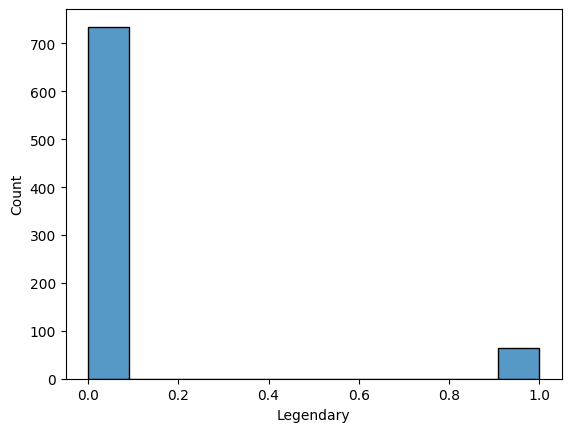

In [83]:
# Representa el histograma de la y en seaborn
import seaborn as sns
sns.histplot(df['Legendary'])


In [110]:
X = df.loc[:, 'Type 1':"Generation"].iloc[:-100, :].copy()
y = df['Legendary'].iloc[:-100].astype(int).copy()

ls_cat = ['Type 1', 'Type 2']
ls_num = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
ls_other = ['Generation']

num_pipe = Pipeline([('imputer', impute.SimpleImputer(strategy='median')), 
                     ('scaler', preprocessing.StandardScaler())])

cat_pipe = Pipeline([('imputer', impute.SimpleImputer(strategy='most_frequent')),
                     ('ohe', preprocessing.OneHotEncoder())])

other_pipe = Pipeline([('imputer', impute.SimpleImputer(strategy='most_frequent'))])

preprocessor = ColumnTransformer([('num', num_pipe, ls_num),
                                    ('cat', cat_pipe, ls_cat),
                                    ('other', other_pipe, ls_other)])
estimator = LogisticRegression(C=10, max_iter=1000000, random_state=31)

pipe = Pipeline([('preprocessor', preprocessor), 
                 ('estimator', estimator)])

grid = {#'estimator__C': [0.01, 0.1, 1, 10, 100],
        'preprocessor__num__imputer__strategy': ['mean', 'median'],
        'preprocessor__num__scaler': [preprocessing.StandardScaler(), 
                                      preprocessing.MinMaxScaler()],
        'preprocessor__cat__ohe': [preprocessing.OneHotEncoder(), 
                                   preprocessing.OrdinalEncoder()],
        'estimator': [LogisticRegression(), SVC(), xgb.XGBClassifier()]}

from sklearn.model_selection import GridSearchCV
cv_model = GridSearchCV(pipe, grid, cv=10, n_jobs=-1, verbose=100, scoring="accuracy")

cv_model.fit(X, y)

d_results = cv_model.cv_results_
df_results = pd.DataFrame(d_results)

model = cv_model.best_estimator_
df_results.sort_values(by='rank_test_score').head(10)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_preprocessor__cat__ohe,param_preprocessor__num__imputer__strategy,param_preprocessor__num__scaler,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
18,0.107983,0.021279,0.022097,0.018404,"XGBClassifier(base_score=None, booster=None, c...",OneHotEncoder(),median,StandardScaler(),"{'estimator': XGBClassifier(base_score=None, b...",0.957143,...,0.985714,0.971429,0.957143,0.900000,0.942857,0.957143,0.957143,0.960000,0.025395,1
16,0.094387,0.017353,0.016594,0.007479,"XGBClassifier(base_score=None, booster=None, c...",OneHotEncoder(),mean,StandardScaler(),"{'estimator': XGBClassifier(base_score=None, b...",0.957143,...,0.985714,0.971429,0.957143,0.900000,0.942857,0.957143,0.957143,0.960000,0.025395,1
23,0.123378,0.022117,0.019630,0.006815,"XGBClassifier(base_score=None, booster=None, c...",OrdinalEncoder(),median,MinMaxScaler(),"{'estimator': XGBClassifier(base_score=None, b...",0.985714,...,0.985714,0.957143,0.971429,0.885714,0.914286,0.957143,0.957143,0.958571,0.032857,3
21,0.116243,0.035557,0.020193,0.016713,"XGBClassifier(base_score=None, booster=None, c...",OrdinalEncoder(),mean,MinMaxScaler(),"{'estimator': XGBClassifier(base_score=None, b...",0.985714,...,0.985714,0.957143,0.971429,0.885714,0.914286,0.957143,0.957143,0.958571,0.032857,3
20,0.104357,0.023725,0.015887,0.010621,"XGBClassifier(base_score=None, booster=None, c...",OrdinalEncoder(),mean,StandardScaler(),"{'estimator': XGBClassifier(base_score=None, b...",0.985714,...,0.985714,0.957143,0.971429,0.885714,0.914286,0.957143,0.957143,0.958571,0.032857,3
22,0.116465,0.029459,0.014930,0.002209,"XGBClassifier(base_score=None, booster=None, c...",OrdinalEncoder(),median,StandardScaler(),"{'estimator': XGBClassifier(base_score=None, b...",0.985714,...,0.985714,0.957143,0.971429,0.885714,0.914286,0.957143,0.957143,0.958571,0.032857,3
19,0.137139,0.028352,0.018729,0.009547,"XGBClassifier(base_score=None, booster=None, c...",OneHotEncoder(),median,MinMaxScaler(),"{'estimator': XGBClassifier(base_score=None, b...",0.957143,...,0.971429,0.971429,0.957143,0.900000,0.928571,0.971429,0.942857,0.957143,0.026342,7
17,0.119491,0.018311,0.017348,0.008993,"XGBClassifier(base_score=None, booster=None, c...",OneHotEncoder(),mean,MinMaxScaler(),"{'estimator': XGBClassifier(base_score=None, b...",0.957143,...,0.971429,0.971429,0.957143,0.900000,0.928571,0.971429,0.942857,0.957143,0.026342,7
0,0.048354,0.017349,0.013983,0.006523,LogisticRegression(),OneHotEncoder(),mean,StandardScaler(),"{'estimator': LogisticRegression(), 'preproces...",0.942857,...,0.942857,0.942857,1.000000,0.928571,0.928571,0.971429,0.942857,0.952857,0.021237,9
2,0.063649,0.023050,0.017997,0.011364,LogisticRegression(),OneHotEncoder(),median,StandardScaler(),"{'estimator': LogisticRegression(), 'preproces...",0.942857,...,0.942857,0.942857,1.000000,0.928571,0.928571,0.971429,0.942857,0.952857,0.021237,9


In [116]:
X.columns

Index(['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation'],
      dtype='object')

In [120]:
column_transformer = model.named_steps['preprocessor']
feature_names = column_transformer.get_feature_names_out()
feature_names

array(['num__Total', 'num__HP', 'num__Attack', 'num__Defense',
       'num__Sp. Atk', 'num__Sp. Def', 'num__Speed', 'cat__Type 1_Bug',
       'cat__Type 1_Dark', 'cat__Type 1_Dragon', 'cat__Type 1_Electric',
       'cat__Type 1_Fairy', 'cat__Type 1_Fighting', 'cat__Type 1_Fire',
       'cat__Type 1_Ghost', 'cat__Type 1_Grass', 'cat__Type 1_Ground',
       'cat__Type 1_Ice', 'cat__Type 1_Normal', 'cat__Type 1_Poison',
       'cat__Type 1_Psychic', 'cat__Type 1_Rock', 'cat__Type 1_Steel',
       'cat__Type 1_Water', 'cat__Type 2_Bug', 'cat__Type 2_Dark',
       'cat__Type 2_Dragon', 'cat__Type 2_Electric', 'cat__Type 2_Fairy',
       'cat__Type 2_Fighting', 'cat__Type 2_Fire', 'cat__Type 2_Flying',
       'cat__Type 2_Ghost', 'cat__Type 2_Grass', 'cat__Type 2_Ground',
       'cat__Type 2_Ice', 'cat__Type 2_Poison', 'cat__Type 2_Psychic',
       'cat__Type 2_Rock', 'cat__Type 2_Steel', 'cat__Type 2_Water',
       'other__Generation'], dtype=object)

<BarContainer object of 42 artists>

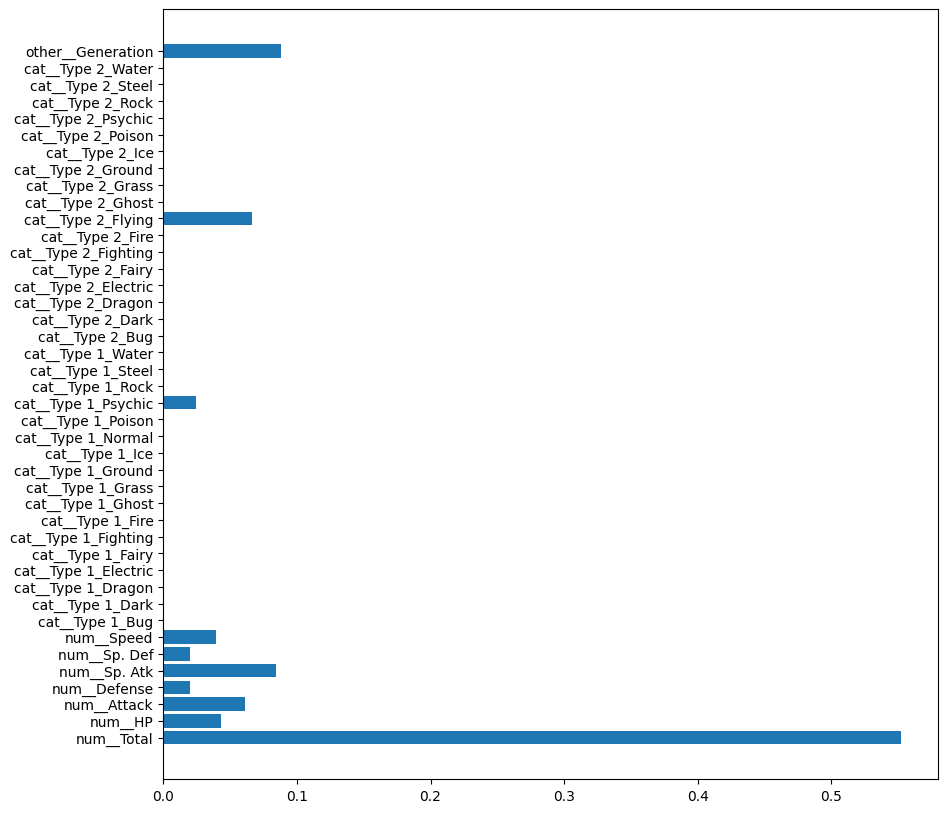

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.barh(y=feature_names, width=model['estimator'].feature_importances_)

In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, pipe.predict(X))

array([[725,  10],
       [ 17,  48]], dtype=int64)

In [81]:
pipe.predict_proba(X.sample(1))

array([[9.99999999e-01, 6.80640489e-10]])

In [30]:
# usa LabelEncoder
from sklearn.preprocessing import LabelEncoder

# transform and map pokemon Type 1 with LabelEncoder
# el método zip te puede ayudar



# transform and map pokemon legendary status with Label Encoder



In [28]:
poke_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,type_1_num,Type 1 zip,Legendary zip
0,Beedrill,Bug,Poison,395,65,90,40,45,80,75,3,False,1,0,0
1,Kingler,Water,NaN,475,55,130,115,50,50,75,2,False,2,14,0
2,Golem,Rock,Ground,495,80,120,130,55,65,45,3,False,3,13,0
3,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,2,False,4,10,0
4,Ditto,Normal,NaN,288,48,48,48,48,48,48,1,False,4,10,0


In [31]:
# Otra forma más sencilla utilizando transform
# ¡Para esto vale fit y transform!
# Muchas transformaciones se dividen en fit (ajusta los parámetros de la transformación)
# y en transform (aplica los cambios)



In [32]:
#haz un head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,type_1_num,Type 1 zip,Legendary zip,Type 1 transformed
0,Beedrill,Bug,Poison,395,65,90,40,45,80,75,3,False,1,0,0,0
1,Kingler,Water,NaN,475,55,130,115,50,50,75,2,False,2,14,0,14
2,Golem,Rock,Ground,495,80,120,130,55,65,45,3,False,3,13,0,13
3,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,2,False,4,10,0,10
4,Ditto,Normal,NaN,288,48,48,48,48,48,48,1,False,4,10,0,10


In [33]:
# comprobamos que la codificación del método es alfabética


array(['Bug', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Ghost',
       'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock',
       'Water'], dtype=object)

In [34]:
# haz un head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,type_1_num,Type 1 zip,Legendary zip,Type 1 transformed
0,Beedrill,Bug,Poison,395,65,90,40,45,80,75,3,False,1,0,0,0
1,Kingler,Water,NaN,475,55,130,115,50,50,75,2,False,2,14,0,14
2,Golem,Rock,Ground,495,80,120,130,55,65,45,3,False,3,13,0,13
3,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,2,False,4,10,0,10
4,Ditto,Normal,NaN,288,48,48,48,48,48,48,1,False,4,10,0,10


The features Type 1 zip and Legendary_zip now depict the numeric representations of our categorical features. Let’s now apply the one-hot encoding scheme on these features. Apply the get_dummies() method.

In [36]:
# encode Type 1 labels using one-hot encoding scheme

# encode legendary status labels using one-hot encoding scheme


In [43]:
#one_hot_df_legendary

In [47]:
# compruebo que solo hay 4 pokemon legendarios


4

In [51]:
# concatena el DataFrame original con la codificación de Type 1 y de Legendary 



,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Type_1_Grass,Type_1_Ground,Type_1_Ice,Type_1_Normal,Type_1_Poison,Type_1_Psychic,Type_1_Rock,Type_1_Water,Legendary_False,Legendary_True
0,Beedrill,Bug,Poison,395,65,90,40,45,80,75,...,0,0,0,0,0,0,0,0,1,0
1,Kingler,Water,NaN,475,55,130,115,50,50,75,...,0,0,0,0,0,0,0,1,1,0
2,Golem,Rock,Ground,495,80,120,130,55,65,45,...,0,0,0,0,0,0,1,0,1,0
3,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,...,0,0,0,1,0,0,0,0,1,0
4,Ditto,Normal,NaN,288,48,48,48,48,48,48,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Vaporeon,Water,NaN,525,130,65,60,110,95,65,...,0,0,0,0,0,0,0,1,1,0
147,Omanyte,Rock,Water,355,35,40,100,90,55,35,...,0,0,0,0,0,0,1,0,1,0
148,Tentacruel,Water,Poison,515,80,70,65,80,120,100,...,0,0,0,0,0,0,0,1,1,0
149,Kabutops,Rock,Water,495,60,115,105,65,70,80,...,0,0,0,0,0,0,1,0,1,0


Consider you built this encoding scheme on your training data and built some model and now you have some new data which has to be engineered for features before predictions as follows.

In [52]:


new_poke_df = pd.DataFrame([['PikaZoom', 'Bug', True], 
                           ['CharMyToast', 'Water', False]],
                           columns=['Name', 'Type 1', 'Legendary'])
new_poke_df


,Name,Type 1,Legendary
0,PikaZoom,Bug,True
1,CharMyToast,Water,False


In [53]:
# usando fit() y transform(), añade Type1_Label y Lgnd_Label en el DataFrame



,Name,Type 1,Type1_Label,Legendary,Lgnd_Label
0,PikaZoom,Bug,0,True,1
1,CharMyToast,Water,14,False,0


You can leverage scikit-learn’s excellent API here by calling the transform(…) function of the previously build LabeLEncoder objects on the new data.

## Dummy Coding Scheme

Let’s try applying dummy coding scheme on Pokémon Type 1 by dropping the first level binary encoded feature (Type 1 = Bug).


In [19]:
# haz un get_dummies para una codificación dummy
# muestra las filas desde la 4 hasta la 9 (incluida)




If you want, you can also choose to drop the last level binary encoded feature

In [20]:
# haz un fit() de Type 1 y mira las clases que aparecen



In [21]:
# haz un dummies sin eliminar ninguna columna que se obtenga solo de Type 1
# haz un head()



In [22]:
# comprueba en la codificación con la columna eliminada (dummy)
# pista: isin te puede ayudar



In [23]:
# comprueba qué hace el signo ~



In [24]:
# haz una lectura en el DataFrame con la última sentencia que emplea ~



In [25]:
# asígnalo a una variable y muestra un head




## Feature Hashing scheme

Find the number of different 'Genre' in the dataset.

In [26]:
# Usa vgsales.csv, léelo y haz un head()




In [27]:
# print('Total game genres: ' + str(len(df_videojuegos.Genre.unique())))
# print(df_videojuegos.Genre.sort_values().unique())

### We can see that there are a total of 12 genres of video games. If we used a one-hot encoding scheme on the Genre feature, we would end up having 12 binary features. Instead, we will now use a feature hashing scheme by leveraging scikit-learn’s FeatureHasher class, which uses a signed 32-bit version of the Murmurhash3 hash function. We will pre-define the final feature vector size to be 6 in this case.